# How to use proof_red.py

This is an example of how to use the functions in the file proof_red.py

We first import them, and define the example configuration we want to reduce.

In [1]:
from proof_red import *

config = "StStSsS"

Remaining configurations : 
Type Index Configuration_name Matrix_of_inclusions
Triangle 0 3 [[2]]
Triangle 2 tS [[1, 4], [2, 1, 4], [3, 1, 4], [4, 1], [5, 1, 4]]
Triangle 6 SsS [[0, 2], [2, 0], [3, 0, 2], [4, 0, 2], [5], [6, 0, 2], [7, 0, 2]]
Triangle 9 SsPsS [[0, 1, 2], [1, 2], [2, 1], [3, 0, 1, 2], [4, 0, 1, 2], [5, 0, 1, 2], [6, 1], [7, 1, 2], [8, 1, 2], [9, 1, 2], [10, 2], [11, 0, 1, 2]]
Pentagon 30 TsSt [[0, 1], [1], [2, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1]]
Pentagon 31 TsSsT [[0, 1, 2], [1, 2], [2, 1], [3, 1, 2], [4, 1, 2], [5, 1, 2], [6, 1], [7, 1, 2], [8, 1, 2], [9, 2], [10, 1, 2]]
Pentagon 32 tStSt [[0, 1], [1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1]]
Pentagon 33 SsTsS [[0, 1, 2], [1, 2], [2, 1], [3, 1, 2], [4, 1, 2], [5, 1], [6, 1, 2, 8], [7, 1, 2, 8], [8, 1, 2], [9, 1, 2, 8], [10, 1, 2, 8], [11, 2]]
Pentagon 34 T?T?T??t [[0], [1, 2], [2, 1], [3], [4], [5, 1, 2], [6, 1, 2], [7, 1, 2], [8], [9]]
Pentagon 35 3??T??sT [[0], [1, 0], [2, 0], 

## Constructing the graph 

We construct the graph and initialize the number of available colors on each vertex

In [12]:
g = words_to_graph(config,'l') # generating the graph
attr_init(g,12) # computing the number of available colors on each vertex

## Drawing the configuration 

For some reason, the drawing does not appear in Jupyter when calling `draw_nice`, but it works when copy-pasting its code.

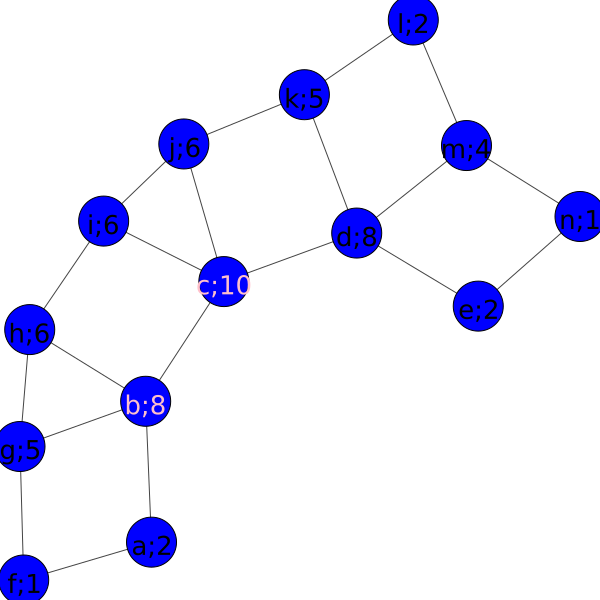

In [13]:
color_dict = {True : "green", False : "blue"} # 3-vertices are green, 4-vertices are blue
g2 = square(g)
P =  find_almost_happy(g2)
C = find_happy(g2)
visual_style = {}
visual_style["vertex_size"] = 50
visual_style["vertex_color"] = [color_dict[b] for b in g.vs["is_3vertex"]]
visual_style["vertex_label"] = [chr(97 + v.index) + ';'+ str(v["colors"]) for v in g.vs]
visual_style["layout"] = g.layout()
visual_style["vertex_label_size"] = 26
visual_style["vertex_label_color"] = visual_label_color(P, C, g2)
plot(g, **visual_style)

We can see that n and f have only one choice, so we have to color them, and afterwards we similarly have to color a, e, l, and then m. This is done by the function easy_update on the square of g.

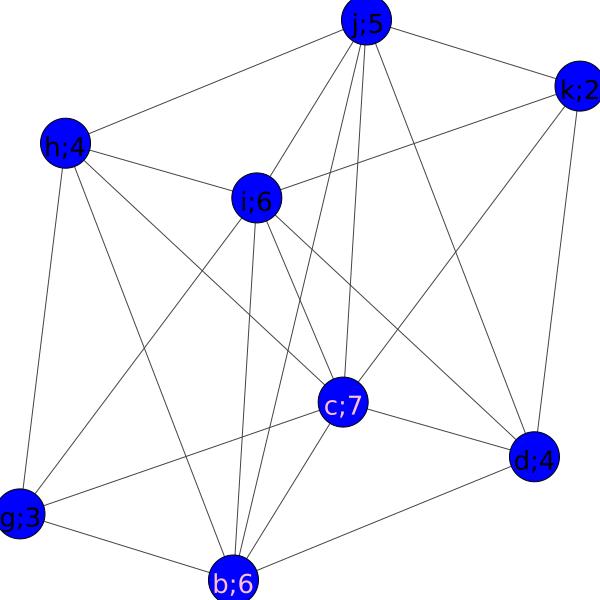

In [15]:
g2 = square(g)
easy_update(g2)

P =  find_almost_happy(g2)
C = find_happy(g2)
visual_style = {}
visual_style["vertex_size"] = 50
visual_style["vertex_color"] = [color_dict[b] for b in g2.vs["is_3vertex"]]
visual_style["vertex_label"] = [chr(97 + v["name"]) + ';' + str(v["colors"]) for v in g2.vs]
visual_style["layout"] = g2.layout()
visual_style["vertex_label_size"] = 26
visual_style["vertex_label_color"] = visual_label_color(P, C, g2)
plot(g2, **visual_style)

We may also just apply the function l_choosable to compute a list of inclusions and possibly conclude.

In [16]:
print(l_choosable(g2))
print(g2.vs['included_in'])

True
[[1, 2], [2, 1], [3, 1, 2], [6, 1, 2], [7, 1, 2], [8, 1, 2], [9, 1, 2], [10, 2]]


We can indeed see that all the lists must be contained in L(b) and L(c). In particular, L(c) is included in L(b) but the former is larger than the latter.